<a href="https://colab.research.google.com/github/AshutoshDhungana/Fare_amount_prediction/blob/main/TCfellowship_Ashutosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing necessary libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset is accessed from a github repository

In [140]:
url = 'https://raw.githubusercontent.com/AshutoshDhungana/Fare_amount_prediction/ff8e7565a08bff043f70c6bc05449443d3825531/uber.csv'
df = pd.read_csv(url, index_col=0)

###Basic Exploratory Data Analysis

In [141]:
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [142]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [144]:
df.shape


(200000, 8)

In [145]:

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [146]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [147]:
df.nunique()

,0
key,200000
fare_amount,1244
pickup_datetime,196629
pickup_longitude,71066
pickup_latitude,83835
dropoff_longitude,76894
dropoff_latitude,90585
passenger_count,8


In [148]:
df.sample(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10560447,2009-02-10 09:17:12.0000002,10.1,2009-02-10 09:17:12 UTC,-73.954101,40.772940,-73.972076,40.751135,1
28067180,2014-10-07 22:44:57.0000002,10.0,2014-10-07 22:44:57 UTC,-73.983307,40.762614,-73.991260,40.749913,1
47556523,2011-09-03 13:09:13.0000001,4.1,2011-09-03 13:09:13 UTC,-73.974101,40.762473,-73.979963,40.754768,1
46238388,2010-01-07 23:19:00.00000081,16.1,2010-01-07 23:19:00 UTC,-74.013325,40.704620,-73.983122,40.665275,1
13809090,2009-11-09 06:34:52.0000001,6.9,2009-11-09 06:34:52 UTC,-73.954914,40.773341,-73.968144,40.786893,1
1408036,2010-12-19 11:52:51.0000002,5.3,2010-12-19 11:52:51 UTC,-73.975647,40.749142,-73.964278,40.764867,1
2250747,2013-11-05 20:02:08.0000001,24.5,2013-11-05 20:02:08 UTC,-73.999501,40.733516,-73.916605,40.780513,2
20339300,2011-10-07 23:52:00.000000136,9.3,2011-10-07 23:52:00 UTC,-73.990957,40.716697,-73.963142,40.714487,1
11154010,2011-05-01 22:26:24.0000003,4.9,2011-05-01 22:26:24 UTC,-74.003475,40.733104,-74.016433,40.716547,1
897759,2015-03-05 06:55:50.0000003,4.5,2015-03-05 06:55:50 UTC,-74.010040,40.721340,-74.014053,40.714939,1


There are many factors that affects the price of a taxi:

1. Travelled distance
2. Total time of travel
3. Demand and availability of a taxi
4. Places to travel to. For example, travelling to an airport would be costly than to another normal place.

In [149]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [150]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


In [151]:
df.dropna(inplace=True)


In [152]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


###Feature engineering:

1. Using the given latitudes and longitudes, we have found the linear distance betweeen the pickup and dropoff point.

In [153]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [154]:
df.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
distance_km,0


2. The data has been further divided into 4 time labels:


*   evening
*   afternoon
*   evening
*   night


In [155]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour

df['pickup_day'] = df['pickup_datetime'].dt.day_name()

In [156]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'


In [157]:
df['time_of_day'] = df['pickup_hour'].apply(categorize_time)
print(df['time_of_day'])

24238194      evening
27835199      evening
44984355        night
25894730      morning
17610152      evening
              ...    
42598914      morning
16382965        night
27804658        night
20259894    afternoon
11951496        night
Name: time_of_day, Length: 199999, dtype: object


In [158]:
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day,time_of_day
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,Thursday,evening
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,Friday,evening
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,Monday,night
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,Friday,morning
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,Thursday,evening


In [159]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,23.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 24238194 to 11951496
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   distance_km        199999 non-null  float64            
 9   pickup_hour        199999 non-null  int32              
 10  pickup_day         199999 non-null  object             
 11  time_of_day        199999 non-null  object             
dtypes: datetime64[ns, UTC](1),

In [161]:
df.shape

(199999, 12)

<Axes: xlabel='fare_amount', ylabel='pickup_day'>

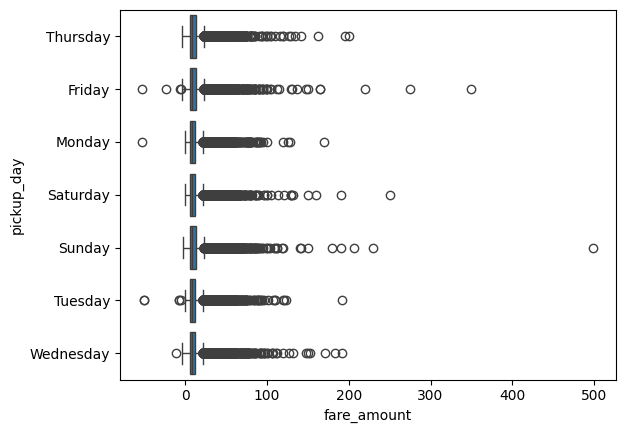

In [162]:
sns.boxplot(x='fare_amount', y='pickup_day', data=df)

Notes:
1. Note that the is minimum value of fare is negative which is -44.9 which is not the valid value, so we need to remove the fare values which are negative, just for caution.
2. Secondly, passenger_count minimum value is 0 and maximum value is 6.   
3. There are two variables with 1 missing value.    
4. Finally, the minimum pickup and dropoff longitudes and latitudes have some wierd large values. Probably, there is a problem here.

# **Data Cleaning :**

1. Deleting the rows that have unsual pickup_latitude and pickup_longitude

In [163]:
pickup_longitude_outliers = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]
pickup_latitude_outliers = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]

try:
    df.drop(pickup_longitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for pickup_longitude_outliers: {e}")

try:
    df.drop(pickup_latitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for pickup_latitude_outliers: {e}")


KeyError for pickup_latitude_outliers: '[33249845] not found in axis'


In [164]:
# Filter out indices that are present in df
existing_longitude_outliers = pickup_longitude_outliers.index.intersection(df.index)
existing_latitude_outliers = pickup_latitude_outliers.index.intersection(df.index)

# Drop these existing outlier indices
df.drop(existing_longitude_outliers, inplace=True)
df.drop(existing_latitude_outliers, inplace=True)


In [165]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day,time_of_day
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,Thursday,evening
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,Friday,evening
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,Monday,night
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,Friday,morning
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,Thursday,evening


2. Deleting the rows that have unsual dropoff_latitude and dropoff_longitude

In [166]:
dropoff_longitude_outliers = df[(df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)]
dropoff_latitude_outliers = df[(df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)]

In [167]:
try:
    df.drop(dropoff_longitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for dropoff_longitude_outliers: {e}")


try:
    df.drop(dropoff_latitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for dropoff_latitude_outliers: {e}")

In [168]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,20.560330,13.491562
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,379.620738,6.515458
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,1.215167,9.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2.120825,14.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,3.874779,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,8782.898606,23.000000


3. Deleting the unusual fare_amount i.e fare_amount below 5 and fare_amount above *$*500

In [169]:
fare_amount_outliers_min = df[df['fare_amount'] <= 5]
fare_amount_outliers_max = df[df['fare_amount'] > 500]

In [170]:
try:
    df.drop(fare_amount_outliers_min.index, inplace=True)
except KeyError as e:
    print(f"KeyError for fare_amount_outliers_min: {e}")
try:
    df.drop(fare_amount_outliers_max.index, inplace=True)
except KeyError as e:
    print(f"KeyError for fare_amount_outliers_max: {e}")

In [171]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000
mean,12.664186,-72.513453,39.923742,-72.535632,39.934572,1.694768,20.228439,13.525290
std,10.246582,10.411226,6.117170,10.330174,6.082658,1.406254,369.787080,6.531421
min,5.100000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,0.000000
25%,7.000000,-73.992292,40.733990,-73.991535,40.732484,1.000000,1.575278,9.000000
50%,9.300000,-73.981982,40.752158,-73.980090,40.752603,1.000000,2.492311,14.000000
75%,13.800000,-73.967402,40.766608,-73.963253,40.767430,2.000000,4.368860,19.000000
max,499.000000,40.806012,48.018760,40.831932,45.031598,208.000000,8776.106279,23.000000


<Axes: xlabel='distance_km', ylabel='fare_amount'>

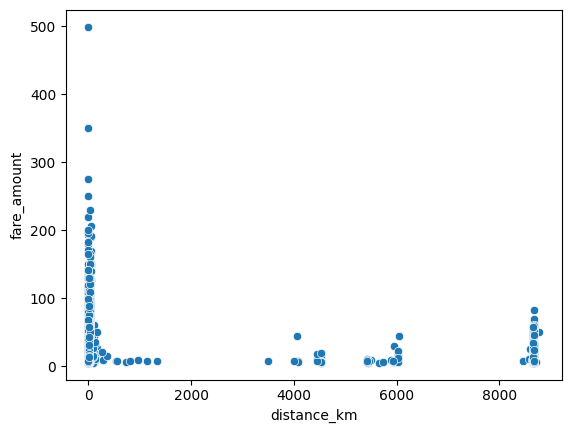

In [172]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)

Further Cleaned the data since the distance_km > 80 had unusual data

In [173]:
distance_km_outliers_min = df[df['distance_km'] <= 0.1]
distance_km_outliers_max = df[df['distance_km'] > 80]

In [174]:
try:
    df.drop(distance_km_outliers_min.index, inplace=True)
except KeyError as e:
    print(f"KeyError for distance_km_outliers_min: {e}")

try:
    df.drop(distance_km_outliers_max.index, inplace=True)
except KeyError as e:
    print(f"KeyError for distance_km_outliers_max: {e}")

In [175]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,163543.000000,163543.000000,163543.000000,163543.000000,163543.000000,163543.000000,163543.000000,163543.000000
mean,12.563705,-73.908925,40.686553,-73.907812,40.686860,1.695328,3.808064,13.524296
std,9.812383,2.711674,2.654980,2.711781,2.655329,1.315217,3.741876,6.529214
min,5.100000,-75.387785,-74.015515,-75.417737,-74.015750,0.000000,0.100431,0.000000
25%,7.000000,-73.992525,40.735337,-73.991727,40.734123,1.000000,1.644799,9.000000
50%,9.300000,-73.982273,40.752736,-73.980570,40.753280,1.000000,2.555477,14.000000
75%,13.700000,-73.968708,40.767038,-73.965118,40.767857,2.000000,4.437921,19.000000
max,230.000000,40.806012,42.478467,40.831932,42.464187,6.000000,64.192811,23.000000


In [176]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day,time_of_day
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,Thursday,evening
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,Friday,evening
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,Monday,night
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,Friday,morning
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,Thursday,evening


In [177]:
df.drop(['pickup_datetime'], axis=1, inplace=True)


<Axes: xlabel='distance_km', ylabel='fare_amount'>

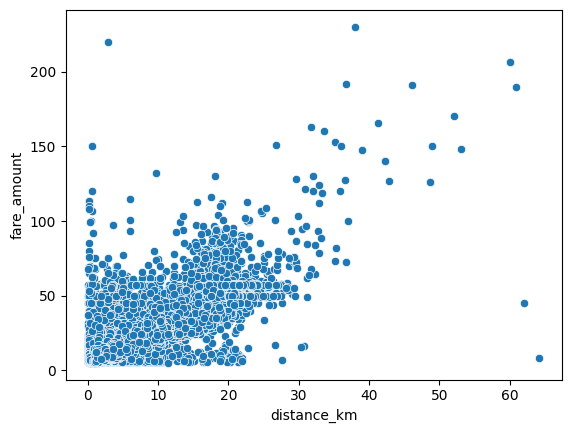

In [178]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)

<ipython-input-179-6c8f08d01823>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'], bins = 10)


<Axes: xlabel='fare_amount', ylabel='Density'>

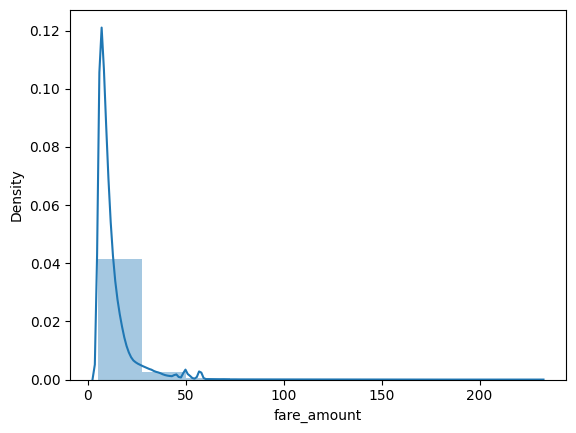

In [179]:
sns.distplot(df['fare_amount'], bins = 10)

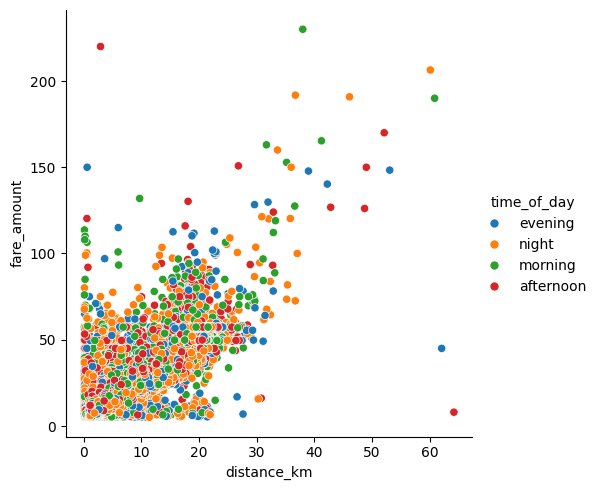

In [180]:
sns.relplot(x='distance_km', y='fare_amount', data=df, hue='time_of_day')

# **Scaling and Normalization**
Performed Standard Scaling

In [181]:
# prompt: perform data scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'fare_amount' column
scaler.fit(df[['fare_amount']])

# Transform the 'fare_amount' column
df['fare_amount_scaled'] = scaler.transform(df[['fare_amount']])


# **Correlation Analysis**

Correlation: a measure of the extent of interdependence between variables.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.<br>
0: No linear correlation, the two variables most likely do not affect each other.<br>
-1: Total negative linear correlation.
<br><p>
Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [182]:
numerical_df = df.select_dtypes(include=['number'])

numerical_df.info()
numerical_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 163543 entries, 24238194 to 11951496
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         163543 non-null  float64
 1   pickup_longitude    163543 non-null  float64
 2   pickup_latitude     163543 non-null  float64
 3   dropoff_longitude   163543 non-null  float64
 4   dropoff_latitude    163543 non-null  float64
 5   passenger_count     163543 non-null  int64  
 6   distance_km         163543 non-null  float64
 7   pickup_hour         163543 non-null  int32  
 8   fare_amount_scaled  163543 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 15.9 MB


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,fare_amount_scaled
24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,-0.516054
27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,-0.495672
44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0.034273
25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,-0.740261
17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,0.350201


In [183]:
correlation_matrix = numerical_df.corr()

correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,fare_amount_scaled
fare_amount,1.000000,0.013266,-0.009550,0.011511,-0.009318,0.009351,0.889348,-0.026876,1.000000
pickup_longitude,0.013266,1.000000,-0.993963,0.999865,-0.993927,0.010877,0.005110,0.001093,0.013266
pickup_latitude,-0.009550,-0.993963,1.000000,-0.993949,0.999918,-0.010940,-0.002131,-0.000354,-0.009550
dropoff_longitude,0.011511,0.999865,-0.993949,1.000000,-0.993911,0.010869,0.004048,0.000042,0.011511
dropoff_latitude,-0.009318,-0.993927,0.999918,-0.993911,1.000000,-0.010891,-0.001362,-0.000388,-0.009318
passenger_count,0.009351,0.010877,-0.010940,0.010869,-0.010891,1.000000,0.003637,0.015354,0.009351
distance_km,0.889348,0.005110,-0.002131,0.004048,-0.001362,0.003637,1.000000,-0.040726,0.889348
pickup_hour,-0.026876,0.001093,-0.000354,0.000042,-0.000388,0.015354,-0.040726,1.000000,-0.026876
fare_amount_scaled,1.000000,0.013266,-0.009550,0.011511,-0.009318,0.009351,0.889348,-0.026876,1.000000


<Axes: >

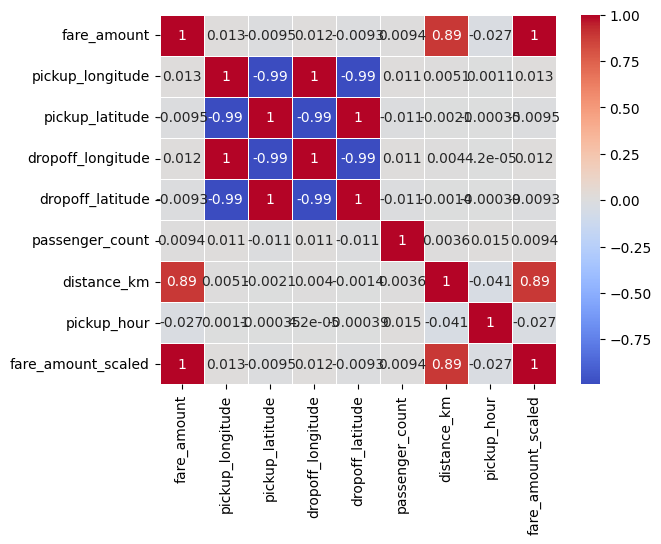

In [184]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

(0.0, 241.3069317794961)

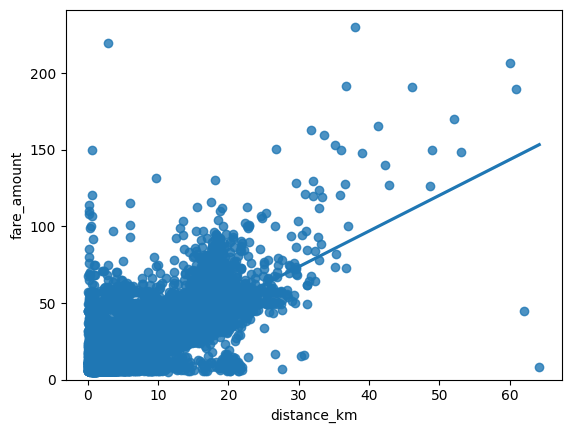

In [185]:
sns.regplot(x="distance_km", y="fare_amount", data=df)
plt.ylim(0,)

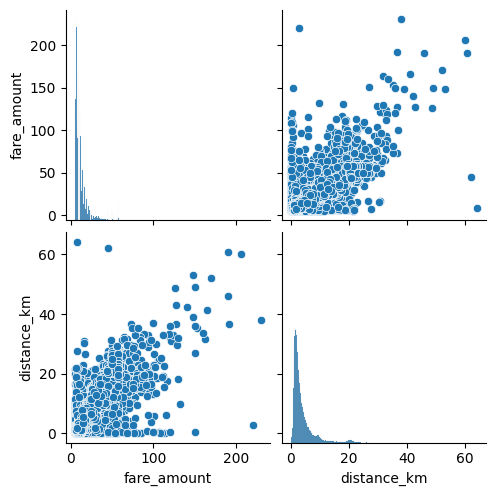

In [186]:
sns.pairplot(df[['fare_amount', 'distance_km']])


# **Splitting the dataset**
The dataset was split into two parts (Train-test split of 70-30)


In [187]:
from sklearn.model_selection import train_test_split

In [197]:
X = df[['distance_km']]
y = df['fare_amount_scaled']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [199]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 114480
Test set size: 49063


# **Model Training**

After trying many different models, finally setteled for gradient boosting model since it achieved the most accuracy score

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)



NameError: name 'LinearRegression' is not defined

In [200]:

gb_model = GradientBoostingRegressor(n_estimators=65, learning_rate=0.1, max_depth=3, random_state=110)

gb_model.fit(X_train, y_train)

#Testing
y_pred = gb_model.predict(X_test)


#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Absolute Error: 0.2452226652528129
Mean Squared Error: 0.19135491969113758
R-squared: 0.8119860472360085


In [201]:
# Predictions on training set
y_train_pred = gb_model.predict(X_train)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training R-squared: {train_r2}")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")

Training R-squared: 0.806766612534513
Training MSE: 0.1917612512406623
Training MAE: 0.2447296441344331


In [202]:
# Predictions on test set
y_test_pred = gb_model.predict(X_test)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test R-squared: {test_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

Test R-squared: 0.8119860472360085
Test MSE: 0.19135491969113758
Test MAE: 0.2452226652528129


In [203]:
new_data = pd.DataFrame({
    'distance_km': [2.7, 3.1, 1.2]
    #'feature_2': [value4, value5, value6],
    # Add all the necessary features here
})

In [205]:
new_predictions = gb_model.predict(new_data)

# Reverse the scaling to get the actual fare amount predictions
new_predictions_original_scale = scaler.inverse_transform(new_predictions.reshape(-1, 1))

print(new_predictions_original_scale)


[[ 9.76214767]
 [10.62643085]
 [ 6.94115645]]
